# Pryngles Tutorials: basic exploration

This is a tutorial to [pryngles](https://github.com/seap-udea/pryngles) 

> **Notes**: this tutorial works properly for version 0.x.

## Install the package

In [1]:
!python -m pip install pryngles

  Using cached pryngles-0.2.1.3-py3-none-any.whl (31 kB)


If you want to create animations better install this in your system

```
   apt-get install ffmpeg imagemagick
```

This tutorial can be ran in different environments and accordingly you may set different variables to adjust to the environment you're using:

In [1]:
COLAB = 'google.colab' in str(get_ipython())
import matplotlib.pyplot as plt
if COLAB:
  %matplotlib inline
  RESOLUTION = 150
  !apt-get install -y ffmpeg imagemagick &> /dev/null
else:
  %matplotlib nbagg
  RESOLUTION = 100
plt.rcParams['figure.dpi'] = RESOLUTION

## Loading the package

The first thing you need to do is to load the package.

In [2]:
%load_ext autoreload
%autoreload 2
from pryngles import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Creating a planet

You may create a ringed planet using the default characteristics:

In [23]:
sys=System()
S=sys.addStar()
P=sys.addPlanet(center=S)
R=sys.addRing(center=P)
O=sys.addObserver()
RP=sys.ensambleSystem()

Let's check one the attributes of the `RingedPlanet` object:

In [24]:
RP.__dict__["physics"]

{'AS': 0.5,
 'AL': 0.5,
 'taug': 1.0,
 'diffeff': 1.0,
 'reflection_rings_law': <function pryngles._base.System.ensambleSystem.<locals>.<lambda>(x, y)>,
 'wavelength': 5.5e-07,
 'particles': {'q': 3,
  's0': 0.0001,
  'smin': 0.01,
  'smax': 100.0,
  'Qsc': 1,
  'Qext': 2},
 'limb_cs': [0.655]}

The object has a large number of attributes:

In [25]:
len(RP.__dict__)

130

I know! these are a lot but what do you expect.

Let's see the planet:

<IPython.core.display.Javascript object>


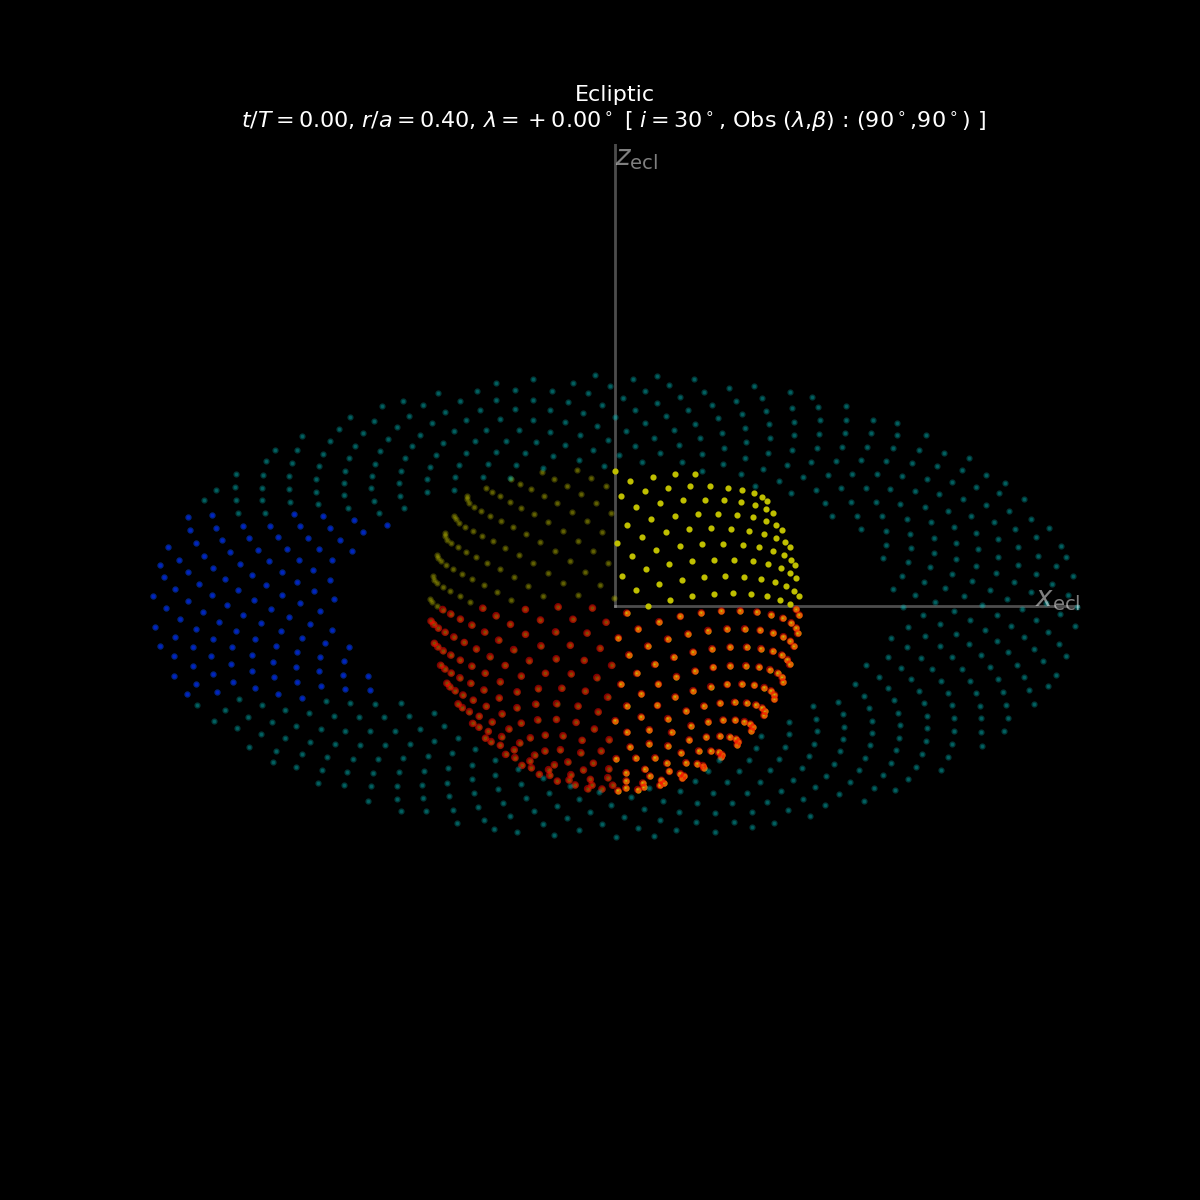

<IPython.core.display.Javascript object>


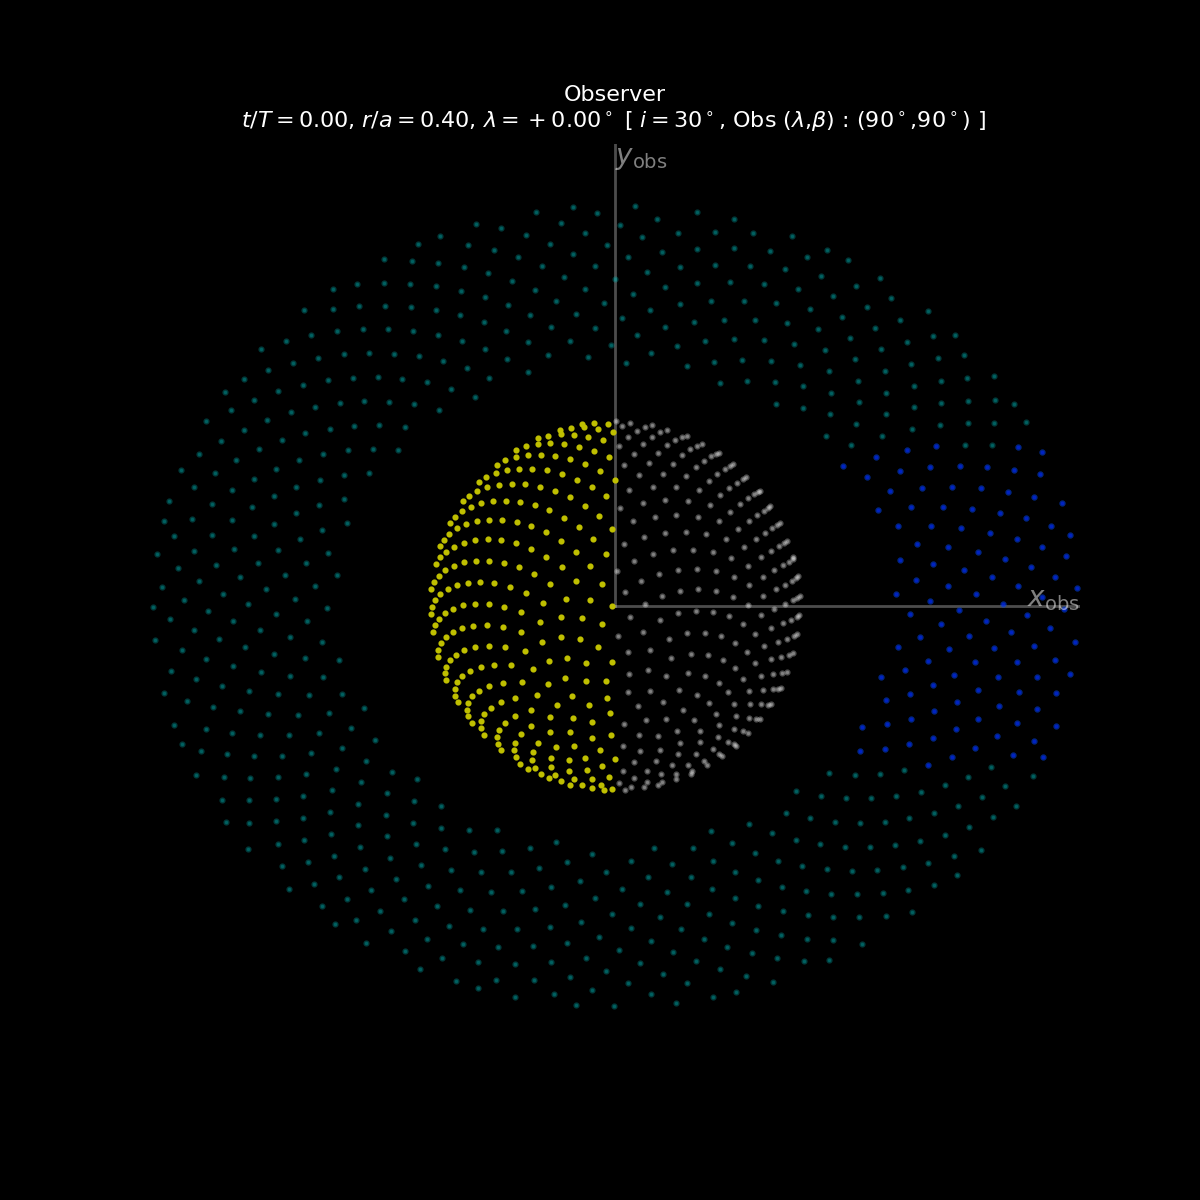

<IPython.core.display.Javascript object>


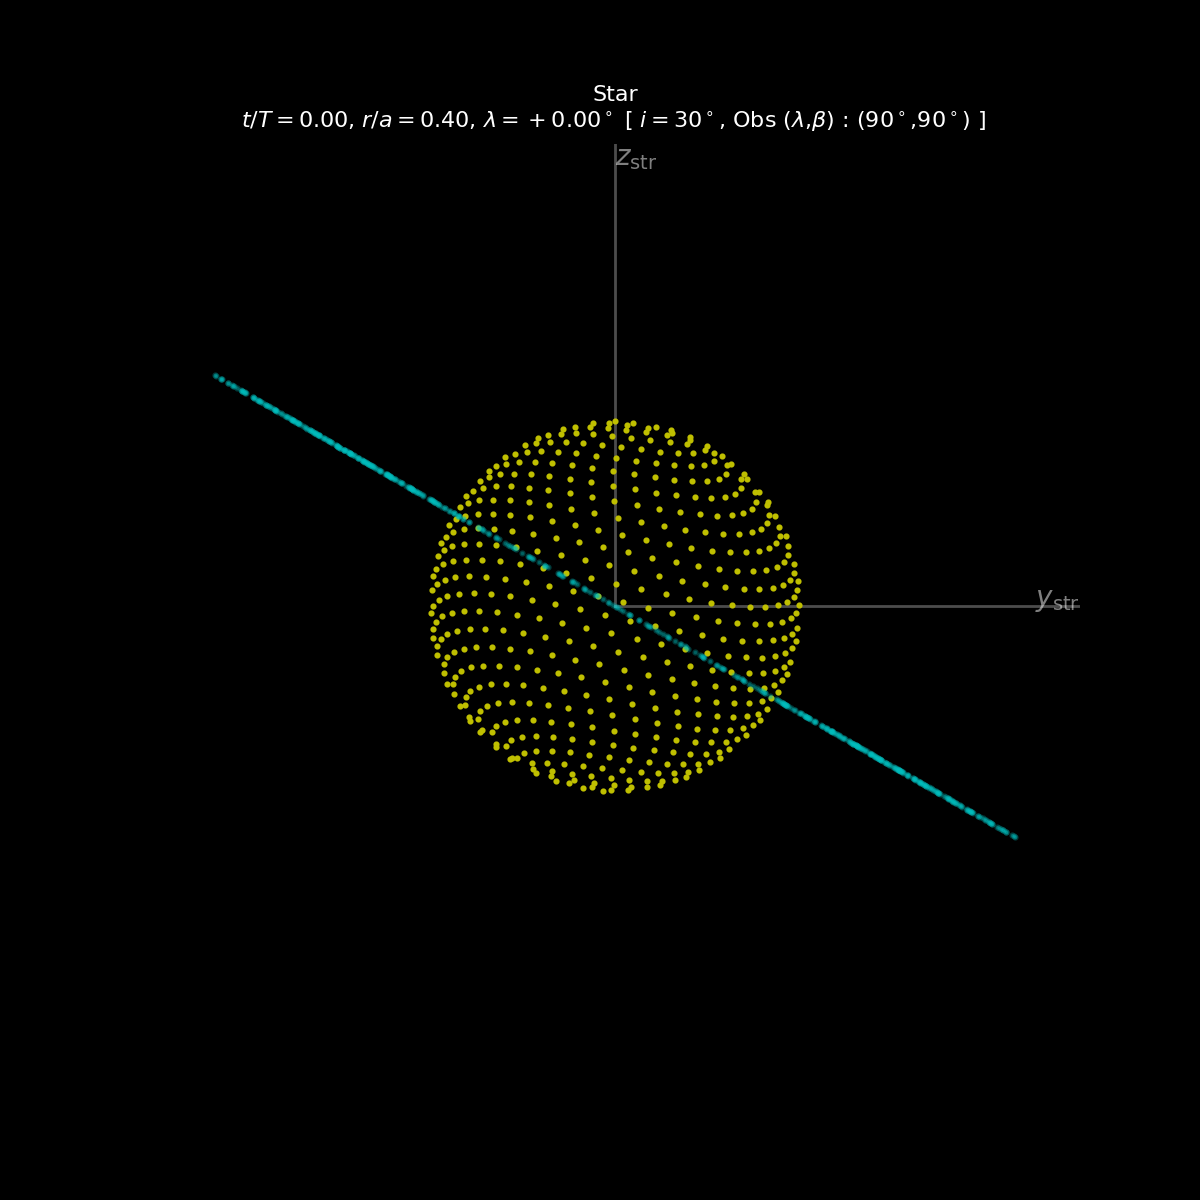

(<Figure size 600x600 with 1 Axes>,
 <Figure size 600x600 with 1 Axes>,
 <Figure size 600x600 with 1 Axes>)

In [26]:
RP.plotRingedPlanet()

However Jupyter tends to display several plots in a *scrolling* cell.  You can manipulate the plots individually:

<IPython.core.display.Javascript object>


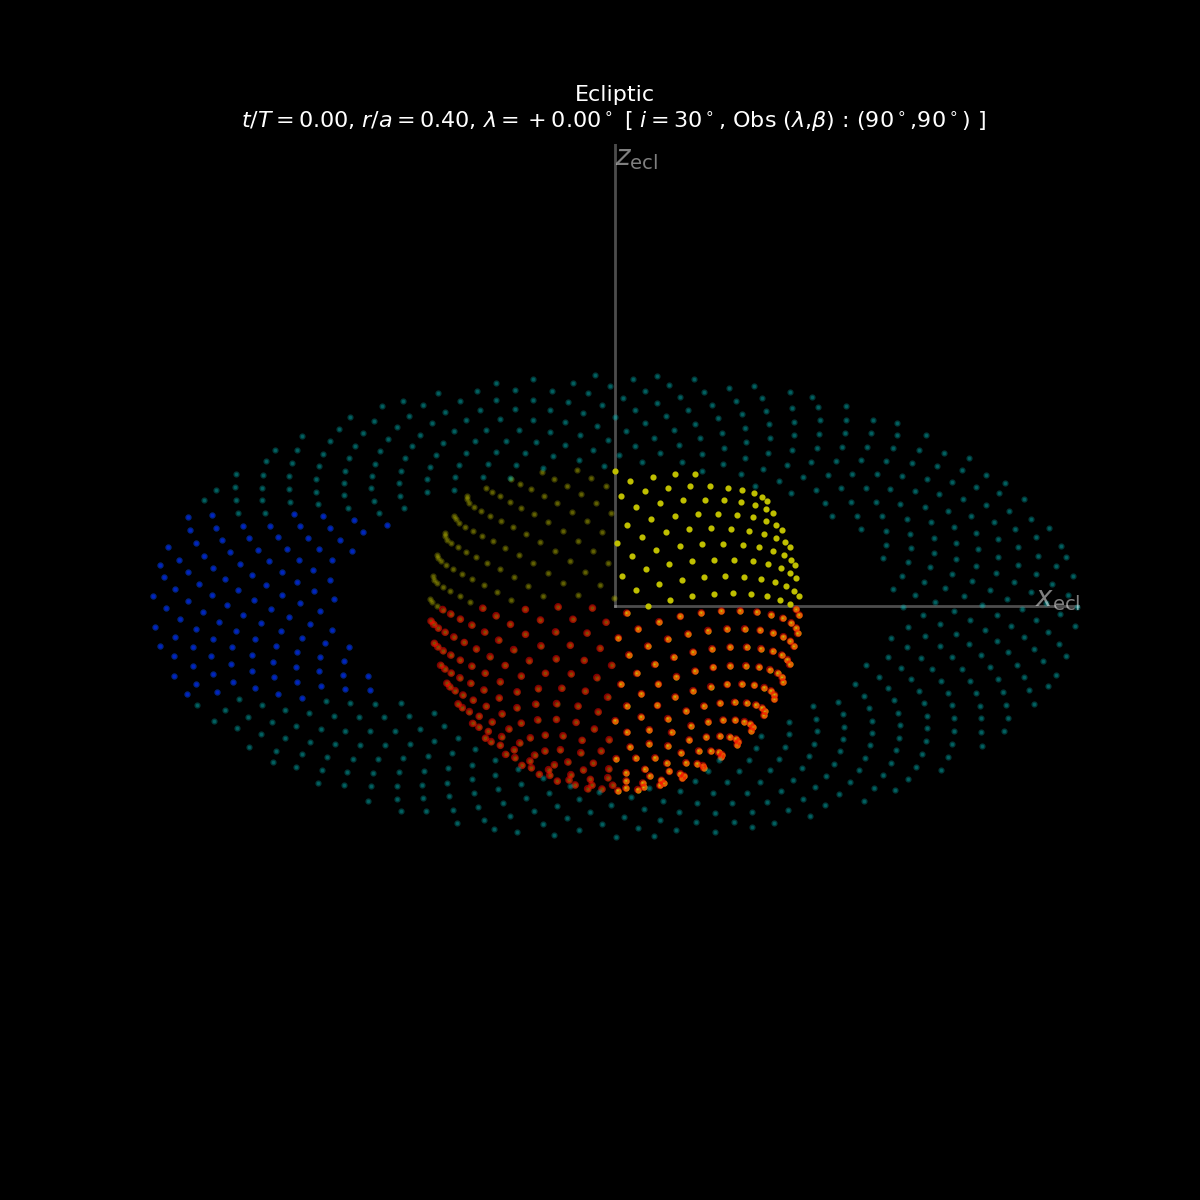

In [27]:
fig1,fig2,fig3=RP.plotRingedPlanet(showfig=0)
plt.close("all")
fig1

This is how the planet is seen from the ecliptical plane (the plane of the orbit)

If you like animations (how the shadow moves around the planet) you can do it with the following commands, but first you need to check if the `convert` of imagemagick is available:

In [28]:
!convert --version

Version: ImageMagick 7.1.0-30 Q16-HDRI arm 19924 https://imagemagick.org
Copyright: (C) 1999 ImageMagick Studio LLC
License: https://imagemagick.org/script/license.php
Features: Cipher DPC HDRI Modules OpenMP(5.0) 
Delegates (built-in): bzlib fontconfig freetype gslib heic jng jp2 jpeg lcms lqr ltdl lzma openexr png ps raw tiff webp xml zlib
Compiler: gcc (4.2)


If not, install it with: `apt-get install imagemagick` (in Linux) of `brew install imagemagick`.

The animation:

In [29]:
RP.animateRingedPlanet(nframes=20,figdir="/tmp",animdir="/tmp")
plt.close("all")

100%|██████████| 20/20 [00:05<00:00,  3.44it/s]


Animations generated:
	/tmp/ecliptic-i_3.0e+01-lambobs_9.0e+01-betaobs_9.0e+01.gif
	/tmp/ecliptic-i_3.0e+01-lambobs_9.0e+01-betaobs_9.0e+01.mp4
Animations generated:
	/tmp/observer-i_3.0e+01-lambobs_9.0e+01-betaobs_9.0e+01.gif
	/tmp/observer-i_3.0e+01-lambobs_9.0e+01-betaobs_9.0e+01.mp4
Animations generated:
	/tmp/stellar-i_3.0e+01-lambobs_9.0e+01-betaobs_9.0e+01.gif
	/tmp/stellar-i_3.0e+01-lambobs_9.0e+01-betaobs_9.0e+01.mp4
Cleaning temporal animation images...


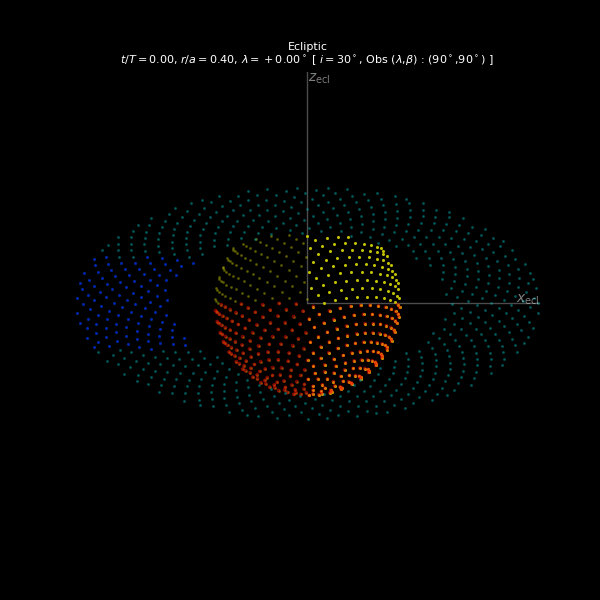

In [30]:
from IPython.display import Image
Image(open("/tmp/ecliptic-i_3.0e+01-lambobs_9.0e+01-betaobs_9.0e+01.gif","rb").read())

## Planet attributes

Now that you have the basics (actually the *graphics* which are by the way pretty amazing!) let's go deeper on the structure of the package.

First we have to check what are the attributes of the planet you may modify.

All the attributes are passed to the *instatiation* method (the method of `RingedPlanet` class you call at the beginning) as optional python arguments, meaning that they are esentially a dictionary.  In the example below we present a dictionary with all the possible attributes you may provide when instantiating a Ringed Planet:

In [31]:
attributes=dict(
    #Behavior
    behavior=dict(shadows=True),
    #Units
    CU=CanonicalUnits(UL=Const.au,UM=Const.Msun),
    #Basic
    Rstar=Const.Rsun/Const.au,Rplanet=Const.Rsat/Const.au,
    Rint=1.5,Rext=2.5,i=30*DEG,a=0.2,e=0.6,
    #Orbit 
    Mstar=1,x=0,lambq=0,t0=0,kepler=False,
    #Observer
    eobs_ecl=np.array([90.0*DEG,90.0*DEG]),
    #Sampling
    Np=100,Nr=100,Nb=100,Ns=30,
    #Physical properties
    physics=dict(
        #Albedos
        AS=0.5,AL=0.5,
        #Ring geometrical opacity
        taug=1.0, #Geometrical opacity
        diffeff=1.0, #Diffraction efficiency
        #Law of diffuse reflection on ring surface
        reflection_rings_law=lambda x,y:x,
        #Observations wavelength
        wavelength=550e-9,
        #Ring particle propeties (see French & Nicholson, 2000)
        particles=dict(q=3,s0=100e-6,smin=1e-2,smax=1e2,Qsc=1,Qext=2),
        #Stellar limb darkening
        limb_cs=[0.6550],
    )
)
P=RingedPlanet(**attributes)

You may read an explanation of each attribute in the *docstring* of the class using the command:

In [32]:
print(RingedPlanet.__doc__)


    Class Ringed Planet.
    
    Conventions:
        cu: Canonical units.
    
    Initialization attributes:
    
        CU = CanonicalUnits(UL=Const.au,UM=Const.Msun): Canonical units used by the calculations.
        
        Planet
            Rplanet = Rsat/au : Radius of the planet, float [au] (0<=Rp)
        Rings:
            Rint=1.5, Rext=2.5: Inner, outer radius of the ring, float [Rp] (1<=Ri, Ri<=Re)
            i = 30 deg: Ring inclination w.r.t. orbital plane, float [rad] (0<=i<pi)
        Star:
            Rstar = Rsun/au : Radius of the star, float [au]
            Mstar=1: Mass of the star, float [cu]
        Orbit:
            a = 0.2 : Stellar-orbit semimajor axis, float [au] (0<a)
            e = 0.6: Stellar-orbit eccentricity, float [adim] (0<=e<1)
            t0=0: Time of passage of the star by periastron, float [cu]
            lambq=0: Longitude of the periastron [rad]
            kepler=False: If True x (see next) is lambda, else x is time, bool
         

Even after you have defined the planet with a given set of attributes, you may change them and update the properties of the planet.  Thus for instance:

In [33]:
P.Nr=P.Np=1000
P.updateProperties()

> **NOTE**: As developer, I do not recommend to change arbitrarily an attribute of the planet.  This may have undesired consequences.  If some key property must be modified it is better to reinstantiate the object:

In [34]:
attributes.update(Nr=1000,Np=1000)
P=RingedPlanet(**attributes)

There are two attributes that can be changed at any time: observer direction and stellar position.

You may for instance be interested on to change stellar position in its orbit:

In [35]:
P.changeStellarPosition(45*DEG)

Let's see the effect:

<IPython.core.display.Javascript object>


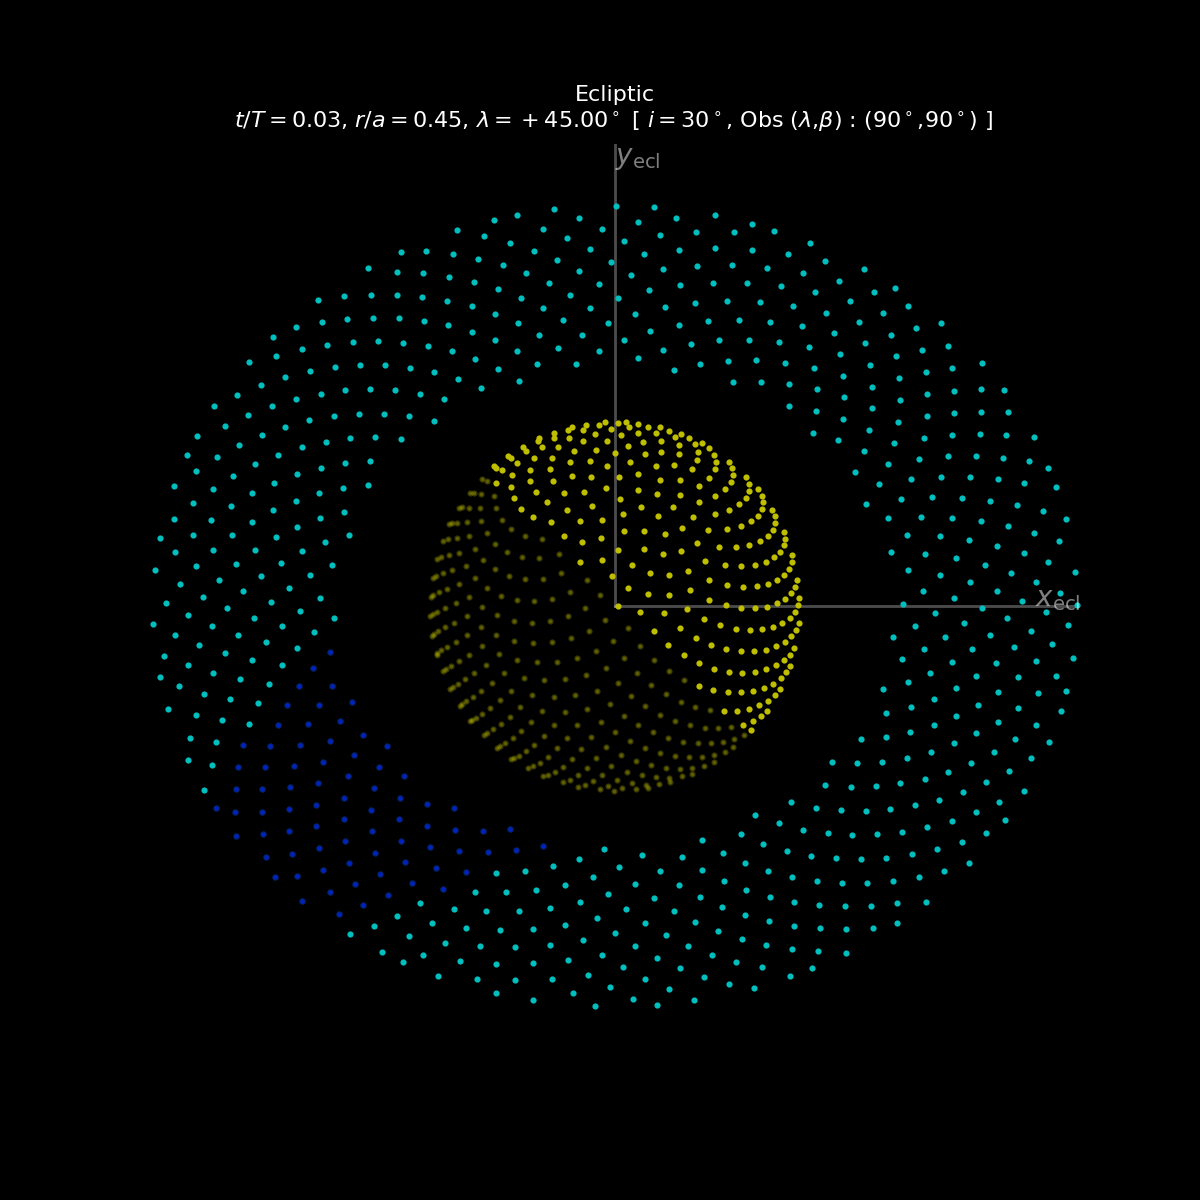

In [36]:
fig1,fig2,fig3=P.plotRingedPlanet(view='top',showfig=0)
plt.close("all")
fig1

Please notice how the illuminated side of the planet and the shadow casted on the ring are now rotated.

To understand why we talk about *stellar position* see the following diagram:

![Stellar orientation](https://raw.githubusercontent.com/seap-udea/pryngles-public/master/gallery/orbit_ring_orientation.png)

As you see we consider that the star is who is actually orbiting the planet (this is a planeto-centric) model.

`fig1` (in the list of figures that `plotRingedPlanet` method produce) is a view in the *Ecliptic* {ecl} system of coordinates.

Actually we recognize other four systems of coordinates (see Figure below):

![System of coordinates in the model](https://raw.githubusercontent.com/seap-udea/pryngles-public/master/gallery/reference_frames.png)

One of the most important systems is that of the observer (magenta axes in the previous figures).  The `fig2` object returned by `plotRingedPlanet` shows you the perspective from this system of reference:

<IPython.core.display.Javascript object>


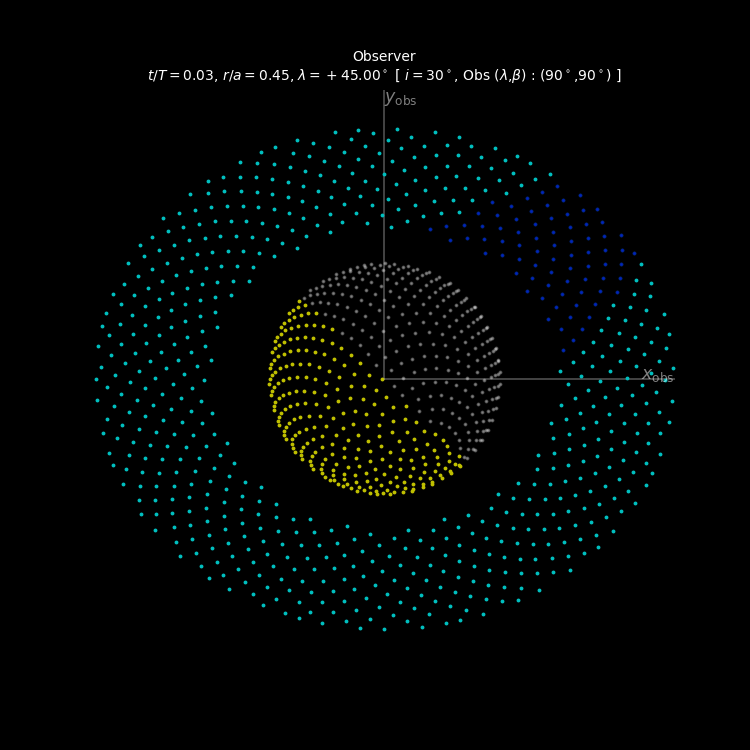

In [20]:
fig2

It is identical to the perspective in the ecliptical system because our observer (by default) is observing the system from above, ie. it is seeing the orbit face on.

Let's change the position of the observer.  This is done by specifying the spherical coordinates in the `{ecl}` system (ecliptical longitude and latitude).  For instance:

In [21]:
P.changeObserver([90.0*DEG,0.0,DEG])

This coordinates places the observer on the x-y plane of the ecliptic (orbital plane) and looking towards the -y axis.  Let's see what the observer sees:

<IPython.core.display.Javascript object>


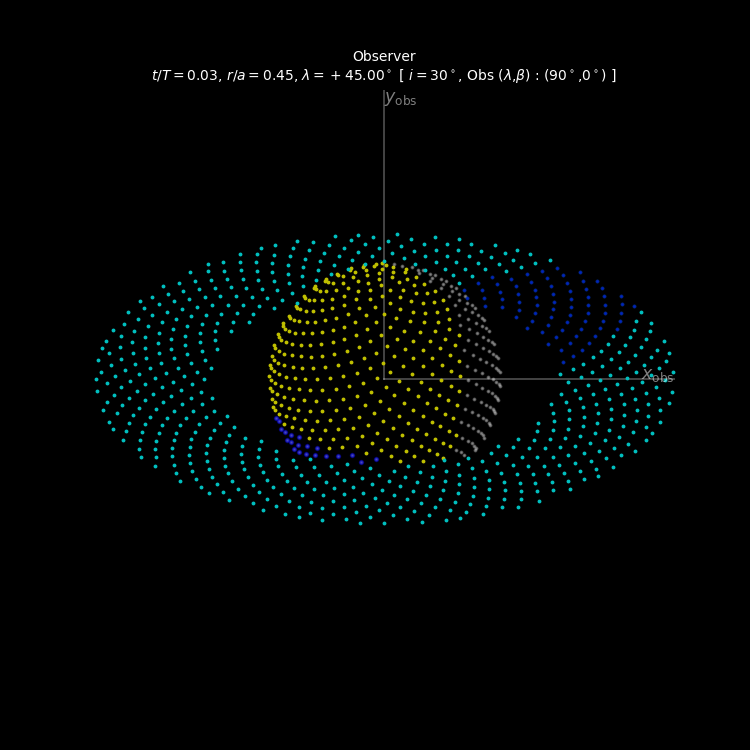

In [22]:
fig1,fig2,fig3=P.plotRingedPlanet(view='top',showfig=0)
plt.close("all")
fig2

Oh yeah! You may probably realize that in this view the model simulates the fact that the observer cannot see part of the ring because the planet is in the middle.  This is not only a graphical attribute of the model, it is very omportant at calculating the light-curve of the system.

You may play around with `P.changeObserver` to understand the meaning of both angles in the argument (remember, they are the ecliptic longitude and latitude of the observer) and with `P.changeStellarPosition`.

<IPython.core.display.Javascript object>


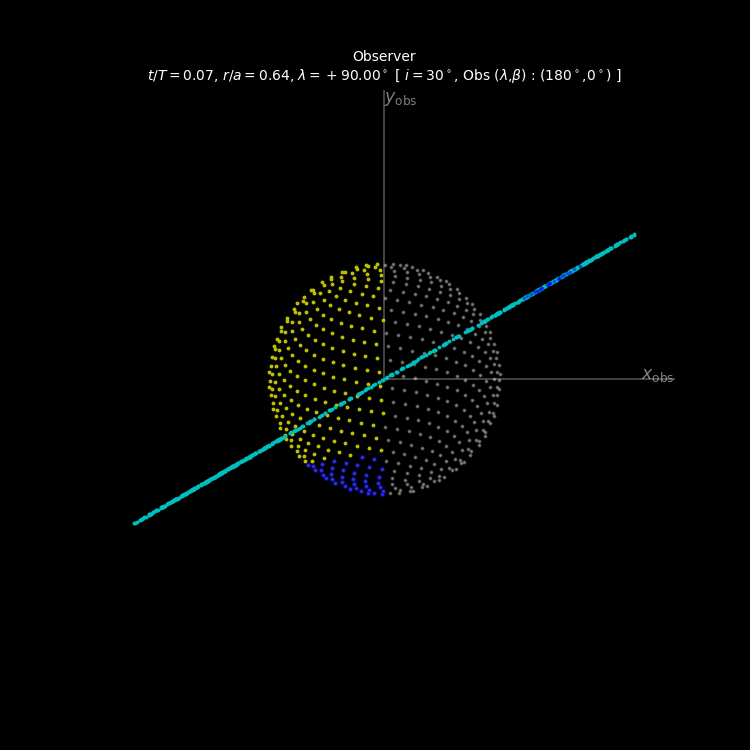

In [23]:
P.changeObserver([180.0*DEG,0.0,DEG])
P.changeStellarPosition(90*DEG)
fig1,fig2,fig3=P.plotRingedPlanet(view='top',showfig=0)
plt.close("all")
fig2

## Transits and occultations

Of course in certain star-planet-observer configurations you may see the planet occulting behind the stellar disk or transiting in front of it.  See for instance:

<IPython.core.display.Javascript object>


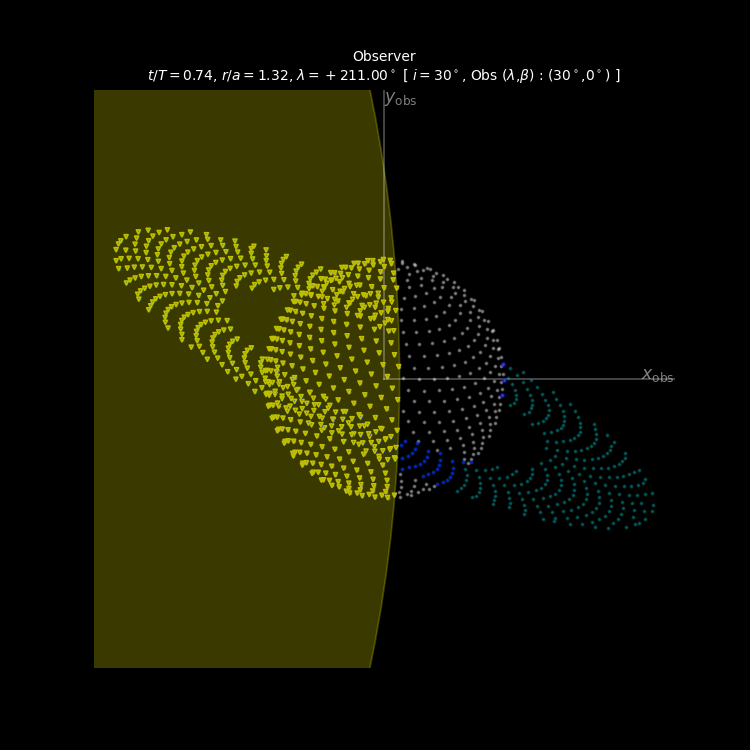

In [24]:
P.changeObserver([+30.0*DEG,0.0,DEG])
P.changeStellarPosition(210*DEG+1*DEG)
fig1,fig2,fig3=P.plotRingedPlanet(showfig=0,showstar=1)
plt.close("all")
fig2

In this case the planet is transiting the star.  And in this case is being occulted by it:

<IPython.core.display.Javascript object>


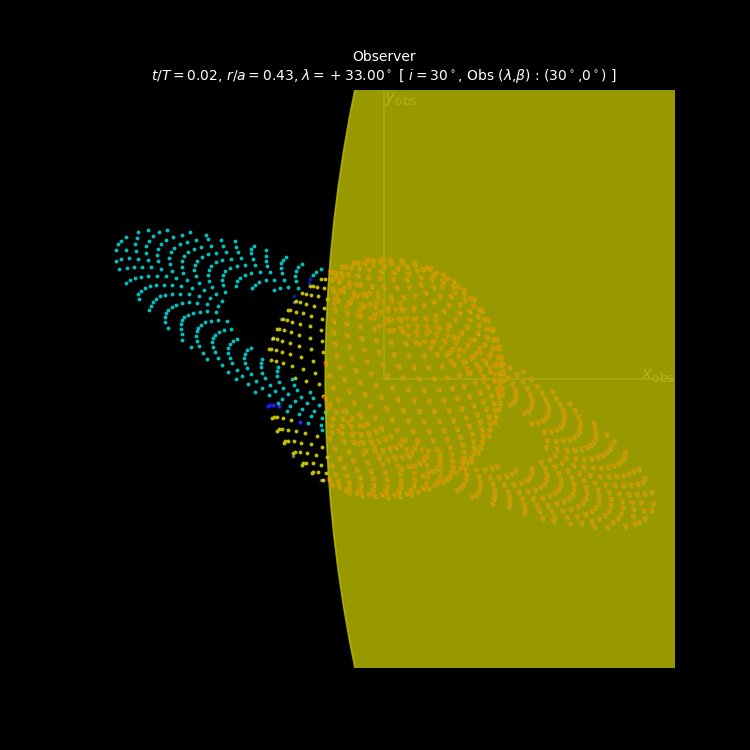

In [25]:
P.changeObserver([+30.0*DEG,0.0,DEG])
P.changeStellarPosition(+30*DEG+3*DEG)
fig1,fig2,fig3=P.plotRingedPlanet(showfig=0,showstar=1)
plt.close("all")
fig2

Notice that in both the ecliptic longitude of the star is slightly (a few degrees) different thant that of the observer (in the occultation case) or that of 180+ecliptic longitude of the observer (in the case of transit).

## Flux computation

Visualtization is great but it is not what pay the bills.  You need to write some papers.

The `pryngles` model was precisely designed to calculate the light reflected by the ringed planet (or absorbed by it when transiting) in different configuration.  This is the *bright-side of the light-curve* part of the package title.

Light-curve computation is hard and we have paid particular attention on to do it well.

In order to compute the light curve we divide the planet and the ring in what we call *spangles* (*sequins* could be a more modern term, but we choose spangles because is nice!).  

Spangles located in the position of the points shown in figures above.  Each spangles have a given set of properties: coordinates in a given system (equatorial, ecliptic or observer), normal vector (in the same set of systems), area and optical properties (Lambertian Albedo).

The number of spangles used for light-curve computations are in this attributes:

In [26]:
P.Np, P.Nr

(1000, 652)

Let's make some simple checkings.  Create a planet excluding ring borders (which are good for visualization but bad for photometry) and with perfect Albedo:

In [27]:
P=RingedPlanet(Nr=1000,Np=1000,Nb=0,physics=dict(AL=1,AS=1))

Let's choose some observer location and stellar position:

In [112]:
P.changeObserver([90*DEG,90*DEG])
P.changeStellarPosition(0.0*DEG)
P.updateOpticalFactors()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Never forget to update optical factors when changing observer and/or stellar positions.

This is the configuration:

<IPython.core.display.Javascript object>


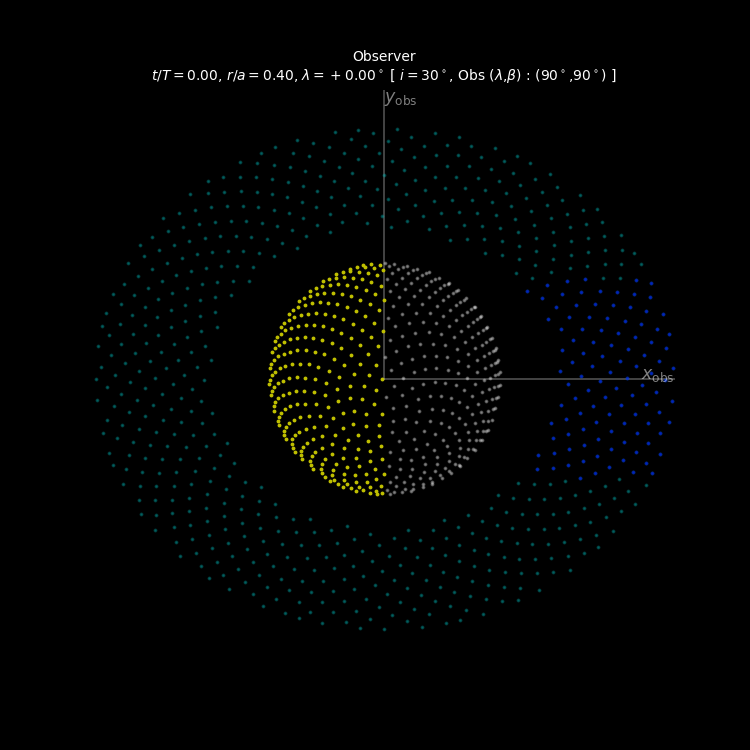

In [29]:
fig1,fig2,fig3=P.plotRingedPlanet(view='top',showfig=0)
plt.close("all")
fig2

### Diffuse reflection on the planet

Let's calculate the light reflected by the planet:

In [30]:
P.updateDiffuseReflection()

This calculate the amount of light reflected on the planetary spangles in an array called `P.Rip`:

In [31]:
P.Rip[-20:]

array([0.00000000e+00, 5.37043014e-09, 0.00000000e+00, 3.67688811e-09,
       4.92340307e-10, 0.00000000e+00, 5.46091734e-09, 0.00000000e+00,
       4.53590380e-10, 2.92198991e-09, 0.00000000e+00, 3.66763255e-09,
       0.00000000e+00, 0.00000000e+00, 3.28096861e-09, 0.00000000e+00,
       1.17931965e-09, 6.96529247e-10, 0.00000000e+00, 1.04810843e-09])

The zero flux is because the spangle is not receiving any light.  

If you want to compute the total amount of light diffusely reflected on the planet use:

In [32]:
Flux_calculated=P.Rip.sum()
Flux_calculated

2.9580709875603356e-06

This flux coincide with what we expect? Normally when a planet has a perfect albedo (AS = 1) and we assume that it is a Lambertian surface, it's normal to assume that light diffusely reflected will be equal to the observed illuminated area (which is half of the effective area, $\pi R_p^2/2$) multiplied by the stellar flux arriving to the planet $1/(4 \pi r^2)$ (the stellar flux is assume to be 1).  Let's see if it coincides:

In [34]:
Flux_expected_tradition=(P.Ap/2)/(4*np.pi*P.rstar**2)
Flux_expected_tradition

2.9593086577575847e-06

It works!

### Diffuse reflection on the ring

To check the diffuse reflection on the ring we need to change the stellar position (and illuminate the ring):

<IPython.core.display.Javascript object>


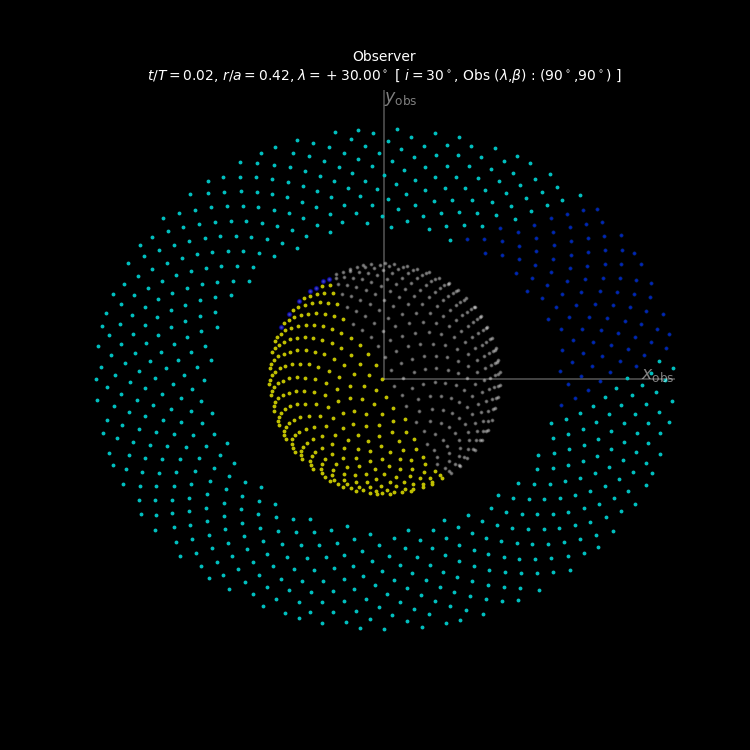

In [35]:
P.changeStellarPosition(30.0*DEG)
P.updateOpticalFactors()
fig1,fig2,fig3=P.plotRingedPlanet(view='top',showfig=0)
plt.close("all")
fig2

Now we have a illuminated ring.  The amount of diffusely reflected light on the ring will be:

In [36]:
P.updateDiffuseReflection()
P.Rir.sum()

4.541792668828089e-06

Let's check our expectations.  If the ring where illuminated and observed normally:

In [37]:
P.Ar/(4*np.pi*P.rstar**2)

2.1355393017690283e-05

But the ring is illuminated in an oblique angle equal to the star declination:

In [38]:
P.estar_equ[1]*RAD

14.477512185929918

So the flux must be:

In [39]:
(P.Ar*np.sin(P.estar_equ[1]))/(4*np.pi*P.rstar**2)

5.338848254422568e-06

The value does not coincide with `P.Rir.sum()`.  This is because the ring has the shadow casted by the planet.  We can account for this counting the number of ring spangles in the shadow:

In [41]:
P.sr.sum()

97

From a total of:

In [42]:
P.Nr

652

So, the expected flux will be finally:

In [43]:
(P.Ar*(1-P.sr.sum()/P.Nr)*np.sin(P.estar_equ[1]))/(4*np.pi*P.rstar**2)

4.54457175031369e-06

Which now in fact almost coincide with the numerical (the difference is due to resolution).

### Transit

Let's compute now the transit.  

First let's consider the most simple case of a completely face on ring and no limbdarkening:

In [94]:
P=RingedPlanet(Nr=1000,Np=1000,Nb=0,i=90*DEG,physics=dict(AL=1,AS=1,taug=1,limb_cs=[]))

For doing this we need to place the planet in front of the star:

<IPython.core.display.Javascript object>


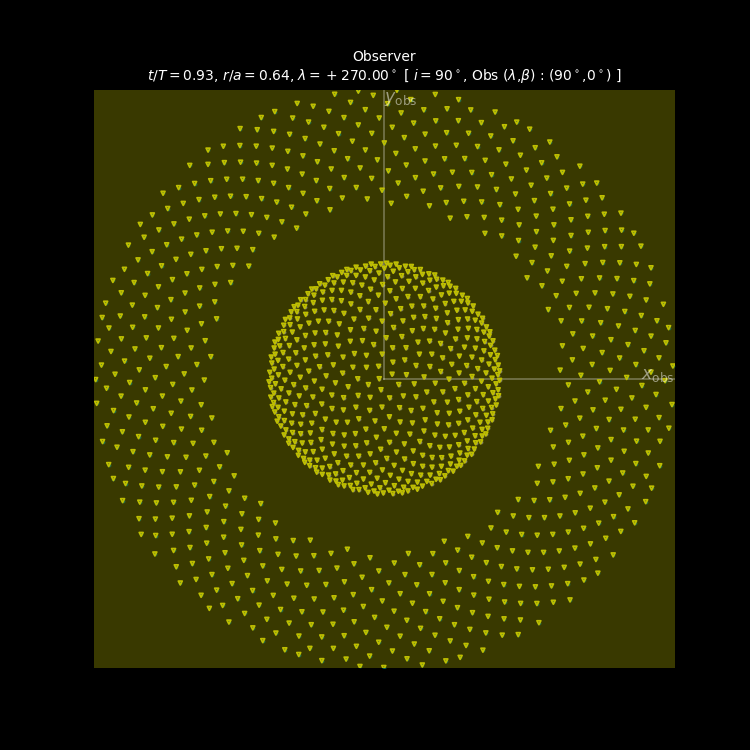

In [95]:
P.changeObserver([90*DEG,0*DEG])
P.changeStellarPosition(+270.0*DEG+0.0*DEG)
P.updateOpticalFactors()
fig1,fig2,fig3=P.plotRingedPlanet(view='top',showfig=0,showstar=1)
plt.close("all")
fig2

Let's compute the attenuation factor, ie. the factor on which the stellar light is attenuated when traversing the ring (rings are not totally opaque).

The area of the planet, the rings and the star (in units where the radius of the star is 1) are:

In [96]:
P.Ap,P.Ar,P.As

(0.022022495411633137, 0.08808998164653253, 3.141592653589793)

There are two opacities involved: the geometrical opacity (`taug`) coming from the geometrical blocking of light caused by ring (mainly large) particles and an effective opacity (`taueff`<`taug`) which take into account the amount of light which is diffracted-out of the direction of the incoming light.  The latest opacity is controlled by another ring attribute called `diffeff` (difraction efficiency) that we assume equal to 1 (all diffracted light is diffracted in the forward direction, so `taueff` = `taug`)

In [97]:
P.taug,P.taueff

(1, 1.0)

The amount of light transmitted by the rings (or better substracted from the star) is proportional to the attenuation factor:

In [98]:
Util.attenuationFactor([np.cos(P.io)],P.taueff)

array([0.13533528])

Of a unit of stellar flux, the amount of light transmitted through the rings is:

In [99]:
beta=1-Util.attenuationFactor([np.cos(P.io)],P.taueff)
beta

array([0.86466472])

We need to take also into account that when transiting the planet and the rings blocked only a small portion of the star whose intensity is calculated with the limb darkening formula.  The flux coming from the center point of the star is:

In [100]:
Io=Util.limbDarkening(0,cs=P.limb_cs,N=P.normlimb)
Io

0.3183098861837907

It is not 1 because only the integral of $I$ across the star surface should be equal to 1.

Now we are ready to compute the transit flux anomaly:

In [101]:
P.updateTransit()

The amount of light blocked by the planet is:

In [102]:
P.Tip.sum()

0.007009978007959997

We can compare it with the theoretical expectation:

In [103]:
P.Ap*Io

0.007009978007959996

Oh yeah!

Now, let's check the ring case:

In [104]:
P.Tir.sum()

0.02424512259508122

That should be compared with the theoretical one:

In [105]:
P.Ar*Io*beta

array([0.02424512])

And again, they coincide. So far, so good.

Let's check a more complex case.  The case of an inclined ring where the ring is overlaped with the planet:

<IPython.core.display.Javascript object>


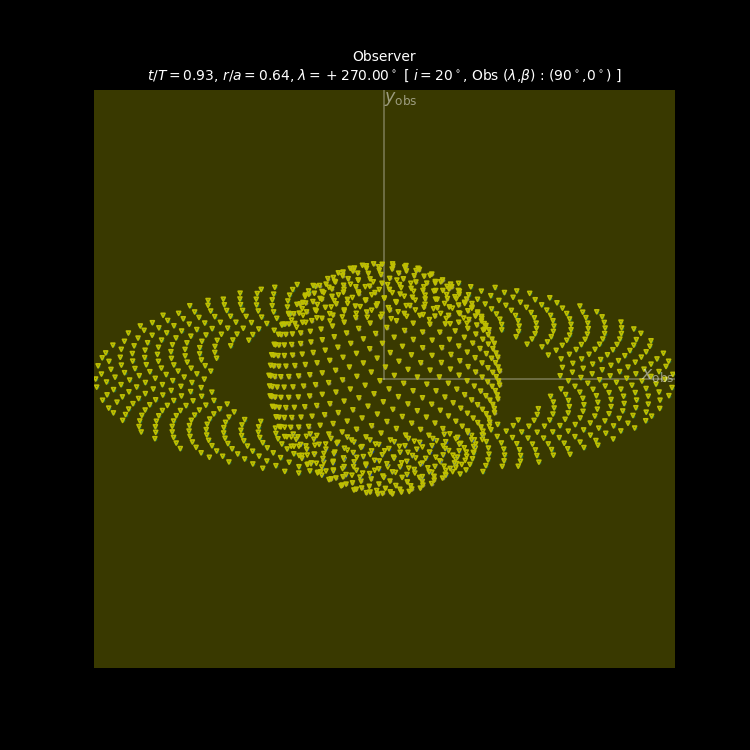

In [106]:
P=RingedPlanet(Nr=1000,Np=1000,Nb=0,i=20*DEG,physics=dict(AL=1,AS=1,taug=1,limb_cs=[]))
P.changeObserver([90*DEG,0*DEG])
P.changeStellarPosition(+270.0*DEG+0.0*DEG)
P.updateOpticalFactors()
fig1,fig2,fig3=P.plotRingedPlanet(view='top',showfig=0,showstar=1)
plt.close("all")
fig2

The attenuation factor is now:

In [107]:
beta=1-Util.attenuationFactor([np.cos(P.io)],P.taug)[0]
beta

0.9915595795501764

A little bit larger than the normal case.

In Zuluaga et al. (2015) they develop a formula to compute the total flux captured by a ringed planet when is completely inside the stellar disk.  It is their Eq. (2) that we include in the package:

In [108]:
Arp=Util.calcRingedPlanetArea(P.Rp,P.fi,P.fe,P.io,beta)
Arp*Io

0.014133987733465114

Let's check out model:

In [109]:
P.updateTransit()
P.Tip.sum()+P.Tir.sum()

0.014185684280067595

And again, they pretty agree inside the precision the resolution allows.

Let's see what happen in the border.  For this we need the stellar apparent size as seen from the planet:

In [60]:
thetas=P.thetas
thetas*RAD

2.0801448478721913

And use it for setting the longitude of the star:

<IPython.core.display.Javascript object>


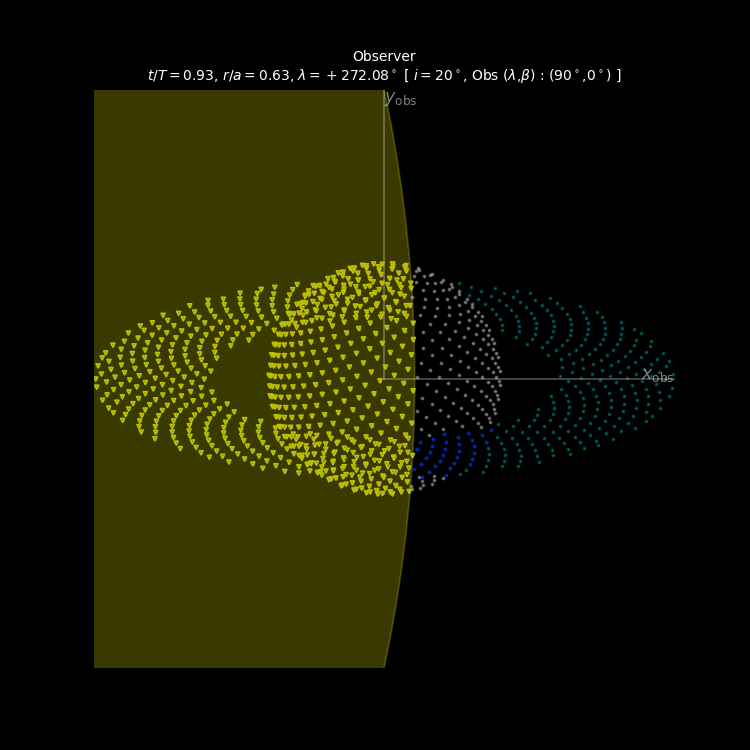

In [61]:
P=RingedPlanet(Nr=1000,Np=1000,Nb=0,i=20*DEG,physics=dict(AL=1,AS=1,taug=1,limb_cs=[]))
P.changeObserver([90*DEG,0*DEG])
P.changeStellarPosition(+270.0*DEG+thetas)
P.updateOpticalFactors()
fig1,fig2,fig3=P.plotRingedPlanet(view='top',showfig=0,showstar=1)
plt.close("all")
fig2

In [62]:
P.updateTransit()
P.Tip.sum()+P.Tir.sum()

0.00828399561142058

As expected this is almost half of the value that when the star is in the middle.

### Occultation

What about occultations? (secondary transit) You ask it, you have it!

Let's first compute the diffusely reflected light from the planet and the ring just before occultation:

<IPython.core.display.Javascript object>


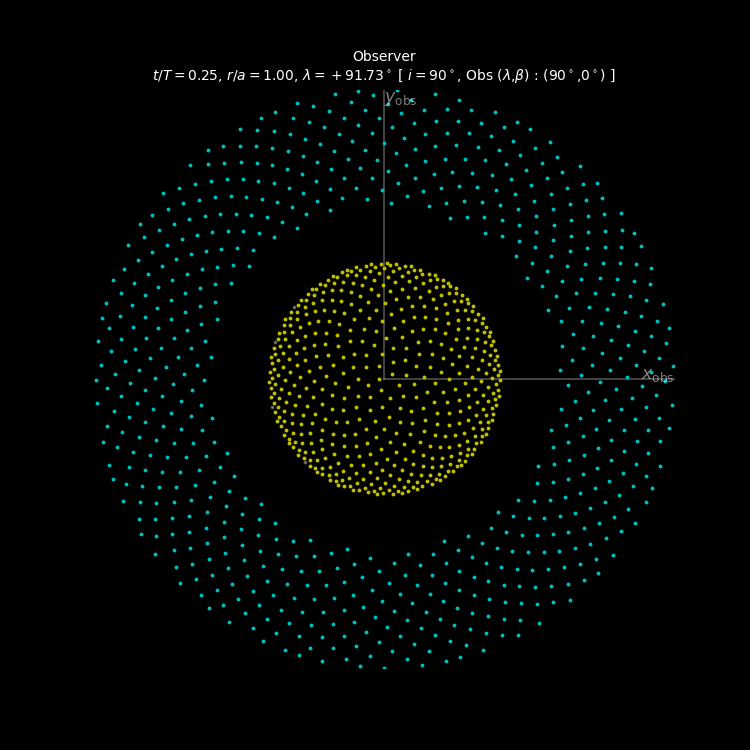

In [63]:
P=RingedPlanet(Nr=1000,Np=1000,Nb=0,i=90*DEG,a=0.2,e=0,
               physics=dict(AL=1,AS=1,taug=1,limb_cs=[]))
P.changeObserver([90*DEG,0*DEG])
P.changeStellarPosition(+90.0*DEG)
P.changeStellarPosition(+90.0*DEG+1.3*P.thetas)
fig1,fig2,fig3=P.plotRingedPlanet(view='top',showfig=0,showstar=1)
plt.close("all")
fig2

In [66]:
(np.pi*P.Rp**2)/(4*np.pi*P.rstar**2),P.Ar/(4*np.pi*P.rstar**2),(np.pi*P.Rp**2+P.Ar)/(4*np.pi*P.rstar**2)

(9.469787704824272e-07, 3.787915081929708e-06, 4.734893852412135e-06)

In [67]:
P.updateOpticalFactors()
P.updateDiffuseReflection()

In [68]:
P.Rip.sum()+P.Rir.sum()

4.730430868883875e-06

And now during occultation:

<IPython.core.display.Javascript object>


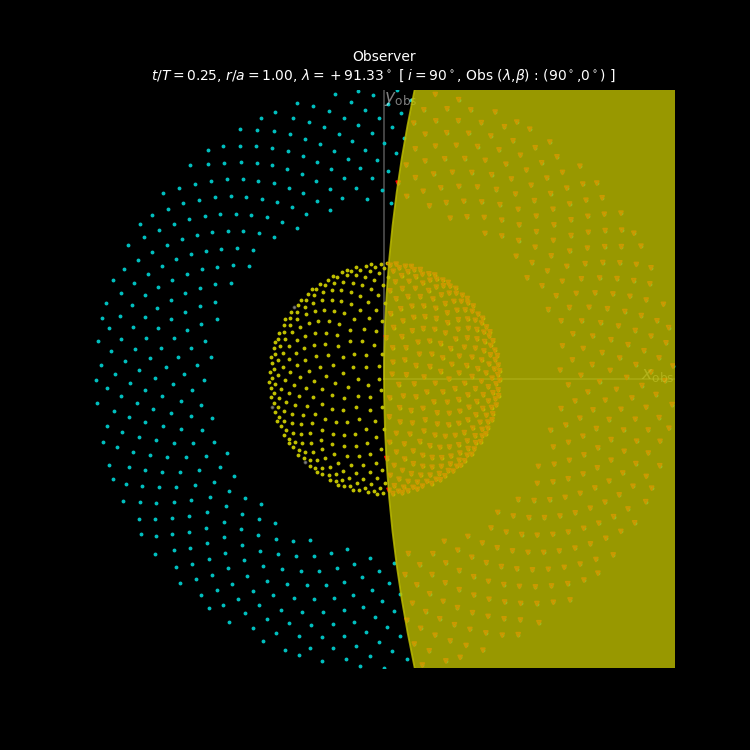

In [69]:
P.changeStellarPosition(+90.0*DEG+P.thetas)
fig1,fig2,fig3=P.plotRingedPlanet(view='top',showfig=0,showstar=1)
plt.close("all")
fig2

In [70]:
P.updateOpticalFactors()
P.updateDiffuseReflection()
P.Rip.sum()+P.Rir.sum()

2.469674543391063e-06

Which, as expected is almost half of the previous value.

### Planet and ring shine

The light diffusely reflected on the planet may shine on the rings and viceversa, this is called *planet or ring shine* 

<IPython.core.display.Javascript object>


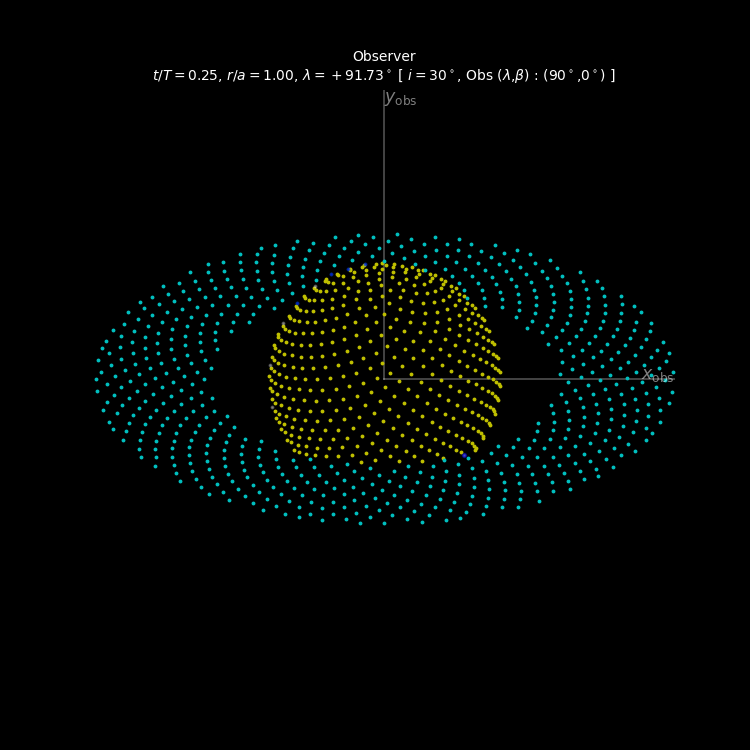

In [71]:
P=RingedPlanet(Nr=1000,Np=1000,Nb=0,i=30*DEG,a=0.2,e=0,physics=dict(AL=1,AS=1,taug=1))
P.changeObserver([90*DEG,0*DEG])
P.changeStellarPosition(+90.0*DEG)
P.changeStellarPosition(+90.0*DEG+1.3*P.thetas)
fig1,fig2,fig3=P.plotRingedPlanet(view='top',showfig=0,showstar=1)
plt.close("all")
fig2

Let's compute it:

In [72]:
P.updateOpticalFactors()
P.updateDiffuseReflection()
P.updateShine()
P.Rip.sum(),P.Sip.sum()+P.Sir.sum()

(8.621190492014887e-07, 6.145384391040049e-08)

As you can see the effect is between 1 and 2 order of magnitude smaller than the diffuse reflection, but it is there!

## Light-curve

Now we have the elements to make a real light-curve.  

Let's start with something we really know: transits!

### Transit light-curve

First let's create a ringed planet orbited by a close-in star:

In [73]:
P=RingedPlanet(Nr=1000,Np=1000,Nb=0,i=30*DEG,a=0.2,e=0,physics=dict(AL=1,AS=1,taug=1))

Lest place the planet at the beginning of the transit:

<IPython.core.display.Javascript object>


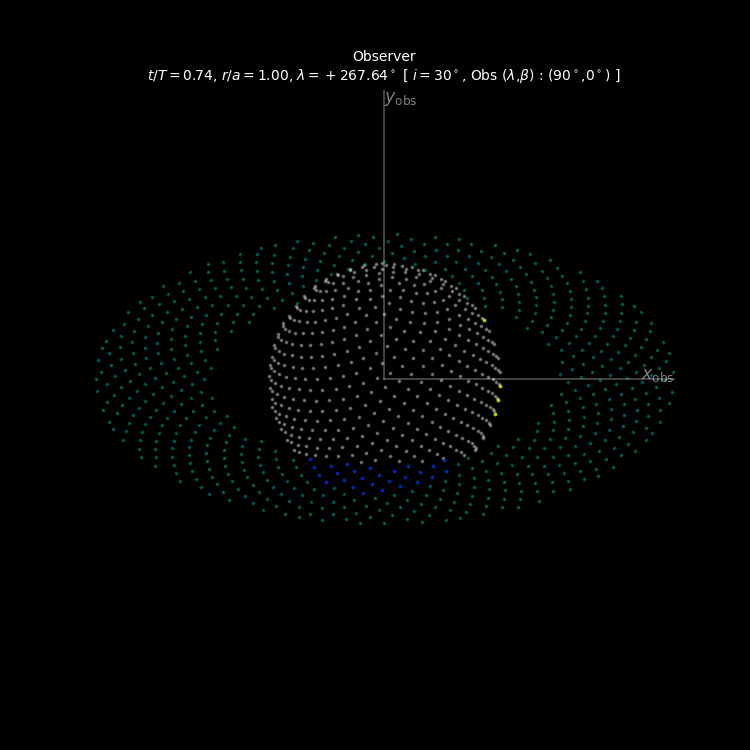

In [74]:
P.changeObserver([90*DEG,0*DEG])
P.changeStellarPosition(+90.0*DEG)
P.changeStellarPosition(+270.0*DEG-thetas-P.fe*P.thetap)
fig1,fig2,fig3=P.plotRingedPlanet(view='top',showfig=0,showstar=1)
plt.close("all")
fig2

And loop:

In [75]:
lamb_initial=+270.0*DEG-thetas-P.fe*P.thetap
lamb_final=+270.0*DEG+thetas+P.fe*P.thetap
lambs=np.linspace(lamb_initial,lamb_final,100)
Tps=[]
Ts=[]
for lamb in lambs:
    P.changeStellarPosition(lamb)
    P.updateOpticalFactors()
    P.updateTransit()
    Tp=P.Tip.sum()
    T=Tp+P.Tir.sum()
    Tps+=[Tp]
    Ts+=[T]

And plot:

<IPython.core.display.Javascript object>


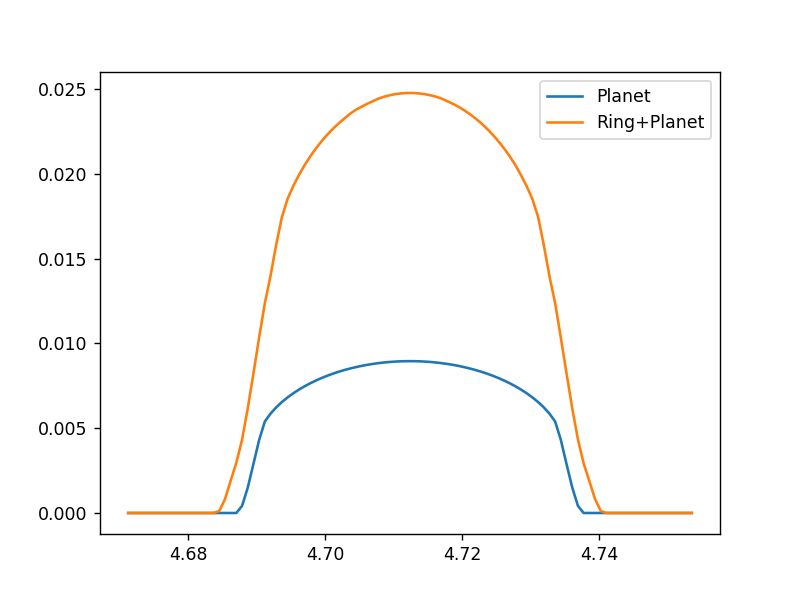

In [76]:
fig=plt.figure()
ax=fig.gca()

ax.plot(lambs,Tps,label="Planet")
ax.plot(lambs,Ts,label="Ring+Planet")
ax.legend()

Oh yeah!

The units in the horizontal axis are not very undertandable.  They are radians and we are used to time since middle transit.  On the other hand we are used to see T as a negative quantity.  

This is how we can make this plot similar to what we have been used to:

<IPython.core.display.Javascript object>


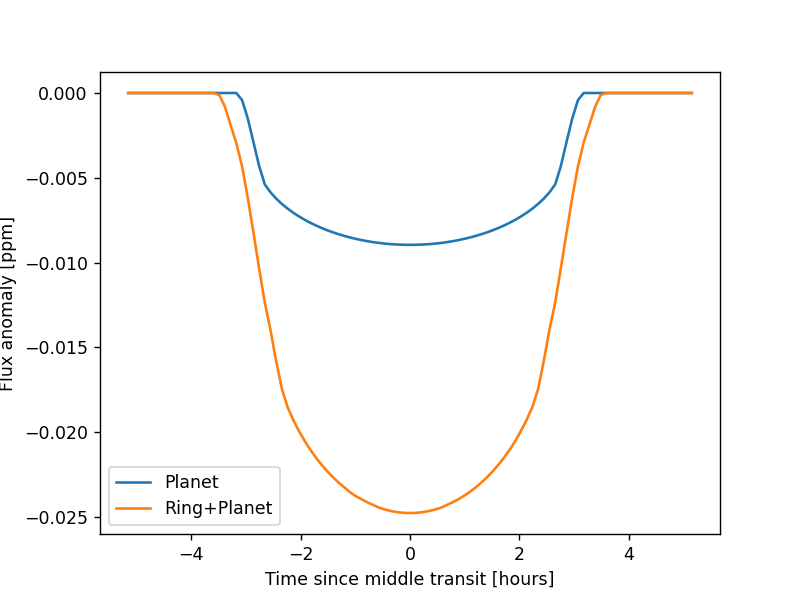

In [77]:
lamb_initial=+270.0*DEG-thetas-P.fe*P.thetap
lamb_final=+270.0*DEG+thetas+P.fe*P.thetap
lambs=np.linspace(lamb_initial,lamb_final,100)
Tps=[]
Ts=[]
ts=[]
for lamb in lambs:
    P.changeStellarPosition(lamb)
    #This attribute keeps the value of time
    t=P.t*P.CU.UT
    
    #Compute transit
    P.updateOpticalFactors()
    P.updateTransit()
    Tp=P.Tip.sum()
    T=Tp+P.Tir.sum()
    
    ts+=[t]
    Tps+=[Tp]
    Ts+=[T]
    
ts=np.array(ts)
Ts=np.array(Ts)
Tps=np.array(Tps)

#Middle transit
tmed=(ts[-1]+ts[0])/2
ts=(ts-tmed)/Const.hours


#Plot
fig=plt.figure()
ax=fig.gca()    
ax.plot(ts,-Tps,label="Planet")
ax.plot(ts,-Ts,label="Ring+Planet")

ax.set_xlabel("Time since middle transit [hours]")
ax.set_ylabel("Flux anomaly [ppm]")

ax.legend()

### Occultation light-curve

<IPython.core.display.Javascript object>


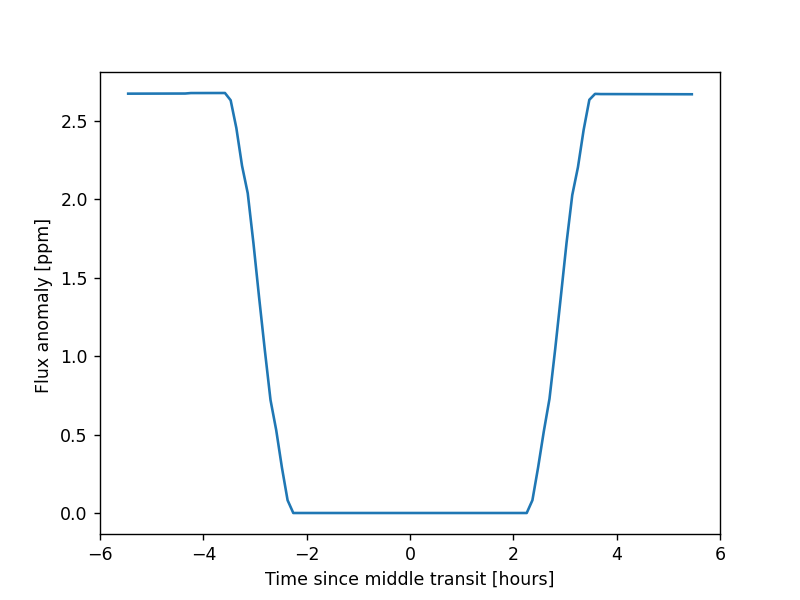

Text(0, 0.5, 'Flux anomaly [ppm] ')

In [78]:
lamb_initial=+90.0*DEG-(thetas+1.5*P.fe*P.thetap)
lamb_final=+90.0*DEG+(thetas+1.5*P.fe*P.thetap)
lambs=np.linspace(lamb_initial,lamb_final,100)
Rs=[]
ts=[]
for lamb in lambs:
    P.changeStellarPosition(lamb)
    #This attribute keeps the value of time
    t=P.t*P.CU.UT
    
    #Compute transit
    P.updateOpticalFactors()
    P.updateDiffuseReflection()
    
    ts+=[t]
    Rs+=[P.Rip.sum()+P.Rir.sum()]
    
ts=np.array(ts)
Rs=np.array(Rs)

#Middle transit
tmed=(ts[-1]+ts[0])/2
ts=(ts-tmed)/Const.hours


#Plot
fig=plt.figure()
ax=fig.gca()    
ax.plot(ts,1e6*Rs)

ax.set_xlabel("Time since middle transit [hours]")
ax.set_ylabel("Flux anomaly [ppm] ")

### Diffuse reflection light-curve


Let's see a light-curve with which we are less familiar: the bright side of the light-curve.

In order to understand it, let´s consider first the issue separating the planet, ring, shadow and shine contributions.

Starting with a simple configuration: a face on orbit.

In order to individualize the contributions we can turn-off every shadow.

In [79]:
P=RingedPlanet(Nr=1000,Np=1000,Nb=0,i=30*DEG,a=0.2,e=0,physics=dict(AL=1,AS=1,taug=1),
               behavior=dict(shadows=0))

Let's compute a light-curve:

<IPython.core.display.Javascript object>


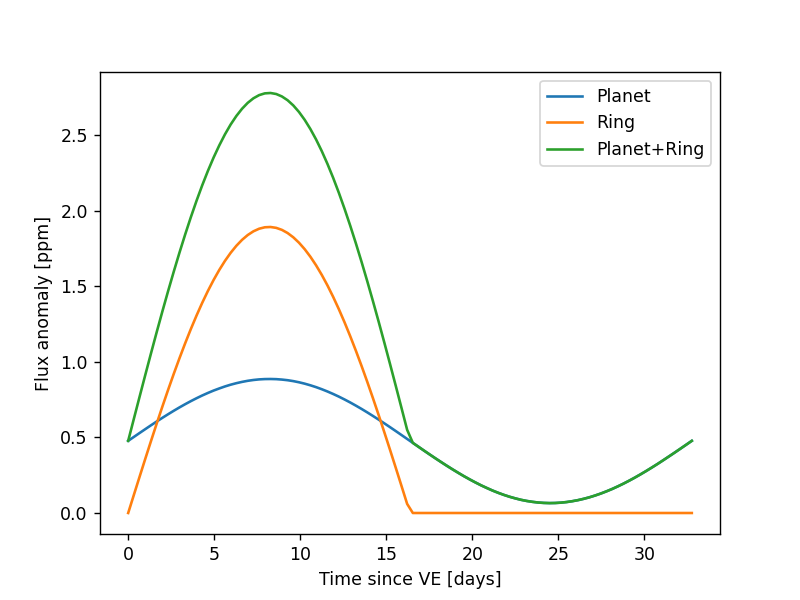

In [80]:
P.changeObserver([90*DEG,30*DEG])
lamb_initial=+0.0*DEG
lamb_final=+360*DEG
lambs=np.linspace(lamb_initial,lamb_final,100)
Rps=[]
Rrs=[]
ts=[]
for lamb in lambs:
    P.changeStellarPosition(lamb)
    ts+=[P.t*P.CU.UT]
    P.updateOpticalFactors()
    P.updateDiffuseReflection()
    Rps+=[P.Rip.sum()]
    Rrs+=[P.Rir.sum()]
    
ts=np.array(ts)
Rps=np.array(Rps)
Rrs=np.array(Rrs)

#Middle transit
ts=(ts-ts[0])/Const.days

#Plot
fig=plt.figure()
ax=fig.gca()    
ax.plot(ts,1e6*Rps,label="Planet")
ax.plot(ts,1e6*Rrs,label="Ring")
ax.plot(ts,1e6*(Rps+Rrs),label="Planet+Ring")

ax.set_xlabel("Time since VE [days]")
ax.set_ylabel("Flux anomaly [ppm]")

ax.legend();

Now including shadows:

In [81]:
P=RingedPlanet(Nr=1000,Np=1000,Nb=0,i=10*DEG,
               a=0.1,e=0.5,lambq=180*DEG,
               physics=dict(AL=1,AS=1,taug=1))

<IPython.core.display.Javascript object>


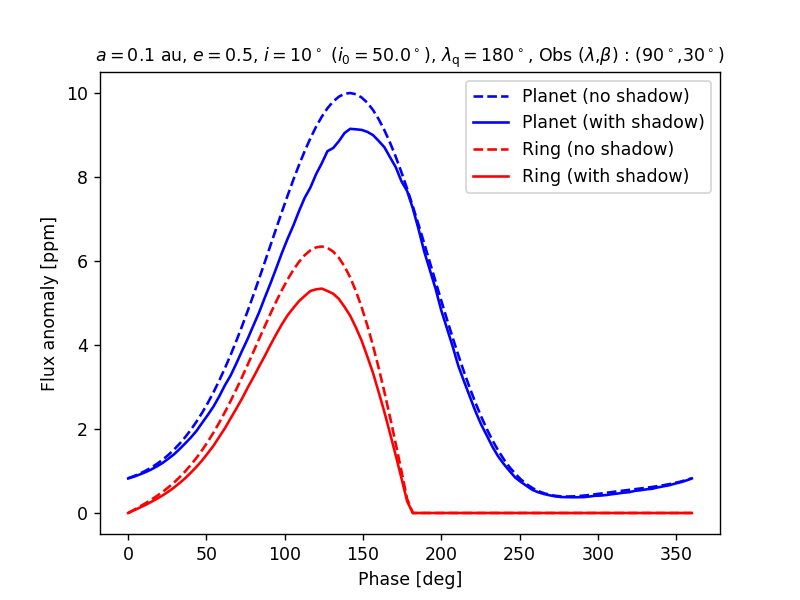

In [82]:
P.changeObserver([90*DEG,30*DEG])

title=f"$a={P.a:g}$ au, $e={P.e:g}$, $i={P.i*RAD:g}^\circ$ ($i_0={P.io*RAD:.1f}^\circ$), $\lambda_\mathrm{{q}}={P.lambq*RAD:g}^\circ$, Obs ($\lambda$,$\\beta$) : ({P.eobs_ecl[0]*RAD:g}$^\circ$,{P.eobs_ecl[1]*RAD:g}$^\circ$)"
lamb_initial=+0.0*DEG
lamb_final=+360*DEG
lambs=np.linspace(lamb_initial,lamb_final,100)
Rps_noshadow=[]
Rrs_noshadow=[]
Rps_wshadow=[]
Rrs_wshadow=[]
S=[]

ts=[]
for lamb in lambs:
    P.changeStellarPosition(lamb)
    ts+=[P.t*P.CU.UT]
    
    P.behavior["shadows"]=0
    P._updateIllumination()
    P._updateVisibility()
    P._updateActivity()
    P.updateOpticalFactors()
    P.updateDiffuseReflection()
    Rps_noshadow+=[P.Rip.sum()]
    Rrs_noshadow+=[P.Rir.sum()]
    
    P.behavior["shadows"]=1
    P._updateIllumination()
    P._updateVisibility()
    P._updateActivity()
    P.updateOpticalFactors()
    P.updateDiffuseReflection()
    Rps_wshadow+=[P.Rip.sum()]
    Rrs_wshadow+=[P.Rir.sum()]
    
    P.updateTransit()
    S+=[P.Rip.sum()+P.Rir.sum()-(P.Tip.sum()+P.Tir.sum())]

ts=np.array(ts)
Rps_noshadow=np.array(Rps_noshadow)
Rrs_noshadow=np.array(Rrs_noshadow)
Rps_wshadow=np.array(Rps_wshadow)
Rrs_wshadow=np.array(Rrs_wshadow)
S=np.array(S)

#Middle transit
ts=(ts-ts[0])/Const.days

#Plot
fig=plt.figure()
ax=fig.gca()    
ax.plot(lambs*RAD,1e6*Rps_noshadow,'b--',label="Planet (no shadow)")
ax.plot(lambs*RAD,1e6*Rps_wshadow,'b-',label="Planet (with shadow)")
ax.plot(lambs*RAD,1e6*Rrs_noshadow,'r--',label="Ring (no shadow)")
ax.plot(lambs*RAD,1e6*Rrs_wshadow,'r-',label="Ring (with shadow)")

ax.set_xlabel("Phase [deg]")
ax.set_ylabel("Flux anomaly [ppm]")
ax.set_title(title,fontsize=10)

ax.legend();

Now you have the basics! Let's play and do some science!

In [116]:
rsun=np.array([np.cos(63.87*DEG)*np.cos(286.13*DEG),np.cos(63.87*DEG)*np.sin(286.13*DEG),np.sin(63.87*DEG)])
rsun

array([ 0.12235349, -0.42307208,  0.8977971 ])

In [119]:
angle=np.arccos(rsun[2]/np.linalg.norm(rsun))*RAD
angle

26.130000000000003

--- 
*The authors*, Last update: may 1, 2022.